In [5]:
#---------------------------- Load Wavelet data
wavelet_trackdata = io.loadmat("Wavelet_PCC.mat")
wavelet_data = wavelet_trackdata['saved_data'];

#---------------------------- Load Frequency data 
freqs_trackdata = io.loadmat("Wavelet_Frequences.mat")
freqs = freqs_trackdata['saved_data'];
freqs = freqs[0]

print(wavelet_data.shape)

(349, 80, 1000)


In [ ]:
def random_crop(image, target_shape, crop_sizes): # Perform random crop, resize back to its target shape
    height, width = image.shape[0], image.shape[1]
    crop_size_idx = np.random.randint(0, len(crop_sizes))
    d = crop_sizes[crop_size_idx]
    x = width - d
    y = height - d
    print(height,"->",y,width,"->",x)
    center = np.random.randint(0, 2)
    print("center",center)
    if center:
        dx = dy = d // 2
    else:
        dx = np.random.randint(0, d + 1)
        dy = np.random.randint(0, d + 1)
    image = image[dy:(y + dy),dx:(x + dx)]
    print("new image shape:",image.shape)
    print("init shape:",target_shape)
    image = resizeImg(image,width,height)
    print(image.shape)
    return image
    

target_shape = wavelet_data.shape
print(target_shape)
img = wavelet_data[51]
crop_sizes = [10 + i for i in range(0,5,2)]
imag_bar = random_crop(img,target_shape[1:],crop_sizes)
Plot_CWT_Small(img)
Plot_CWT_Small(imag_bar)

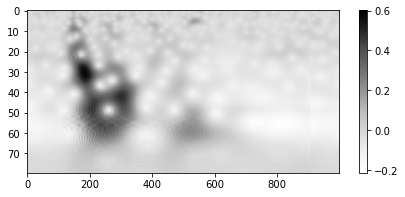

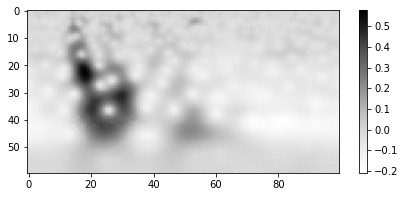

In [22]:
import matplotlib.pyplot as plt

def Plot_CWT_Small(array):
    plt.figure(1, figsize=(7,3))
    plt.imshow(array, cmap='Greys', aspect='auto')
    plt.colorbar()
    plt.show()
    
from cv2 import *
import os

def resizeImg(image, width=None, height=None):
    dim=None
    (h,w) = image.shape[:2]
    if width is None and height is None:
        return image

    elif width is not None and height is not None:
        dim = (width, height)
  
    elif width is None:
        r = height/float(h)
        dim = (int(w*r), height)
    else:
        r = width / float(w)
        dim = (width, int(h*r))
    resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
    return resized

img = wavelet_data[12]
newImage = resizeImg(img,100,60) 
Plot_CWT_Small(img)
Plot_CWT_Small(newImage)

